# Проект: Исследовательский анализ данных

# Описание проекта 

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

# Оглавление

- [Описание проекта](#Описание-проекта)
- [Оглавление](#Оглавление)
- [Выполнению проекта](#Выполнению-проекта)
    - 1. [Откроем файл с данными и изучим общую информацию](#1.-Откроем-файл-с-данными-и-изучим-общую-информацию)
        - [Загрузим данные из csv-файла в датафрейм c помощью библиотеки pandas.](#Загрузим-данные-из-csv-файла-в-датафрейм-c-помощью-библиотеки-pandas.)
        - [Изучите общую информацию о полученном датафрейме.](#Изучите-общую-информацию-о-полученном-датафрейме.)
        - [Построим гистограмму для всех числовых столбцов таблицы на одном графике. Например, для датафрейма data можно построить такую гистограмму командой data.hist(figsize=(15, 20)). Напомним, что параметр figsize задаёт размер графика.](#Построим-гистограмму-для-всех-числовых-столбцов-таблицы-на-одном-графике.-Например,-для-датафрейма-data-можно-построить-такую-гистограмму-командой-data.hist(figsize=(15,-20)).-Напомним,-что-параметр-figsize-задаёт-размер-графика.)
    - 2. [Предобработка данных](#2.-Предобработка-данных)
        - [Определим в каких столбцах есть пропуски](#Определим-в-каких-столбцах-есть-пропуски)
        - [Удаление/Замена пропусков](#Удаление/Замена-пропусков)
        - [Заменим типы данных где это необходимо.](#Заменим-типы-данных-где-это-необходимо.)
        - [Обрабаем аномальные значений](#Обрабаем-аномальные-значений)
        - [Обработка дубликатов](#Обработка-дубликатов)
        - [Вывод.](#Вывод.)
    - 3. [Добавим в таблицу новые столбцы со следующими параметрами:](#3.-Добавим-в-таблицу-новые-столбцы-со-следующими-параметрами:)
    - 4. [Проведем исследовательский анализ данных](#4.-Проведем-исследовательский-анализ-данных)
        - [Изучим перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров.](#Изучим-перечисленные-ниже-параметры-объектов-и-постройте-отдельные-гистограммы-для-каждого-из-этих-параметров.)
        - [Изучим, как быстро продавались квартиры (столбец days_exposition).](#Изучим,-как-быстро-продавались-квартиры-(столбец-days_exposition).)
        - [Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.](#Определим-факторы,-которые-больше-всего-влияют-на-общую-(полную)-стоимость-объекта.)
        - [Посчитайем среднюю цену одного квадратного метра.](#Посчитайем-среднюю-цену-одного-квадратного-метра.)
        - [Рассчитаем зависимость цены и расстояния и среднюю цену каждого километра к центру города.](#Рассчитаем-зависимость-цены-и-расстояния-и-среднюю-цену-каждого-километра-к-центру-города.)
    - 5. [Общий вывод](#5.-Общий-вывод)

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод

# Выполнению проекта

## 1. Откроем файл с данными и изучим общую информацию

### Загрузим данные из csv-файла в датафрейм c помощью библиотеки pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
try:
    estate_data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
    pd.options.display.max_columns = len(estate_data.columns)
except:
    estate_data = pd.read_csv('C:/Users/Marat_Yangurov/Jup_Notebook_Practicum/real_estate_data.csv', sep = '\t')
    pd.options.display.max_columns = len(estate_data.columns)

Для последующей проверки процента очищенных данных посчитаем количество строк в DataFrame

In [3]:
#  Количество строк до обработки
initial_row_count = estate_data.shape[0]
initial_row_count

23699

### Изучите общую информацию о полученном датафрейме.

In [4]:
estate_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Построим гистограмму для всех числовых столбцов таблицы на одном графике. Например, для датафрейма data можно построить такую гистограмму командой data.hist(figsize=(15, 20)). Напомним, что параметр figsize задаёт размер графика.

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

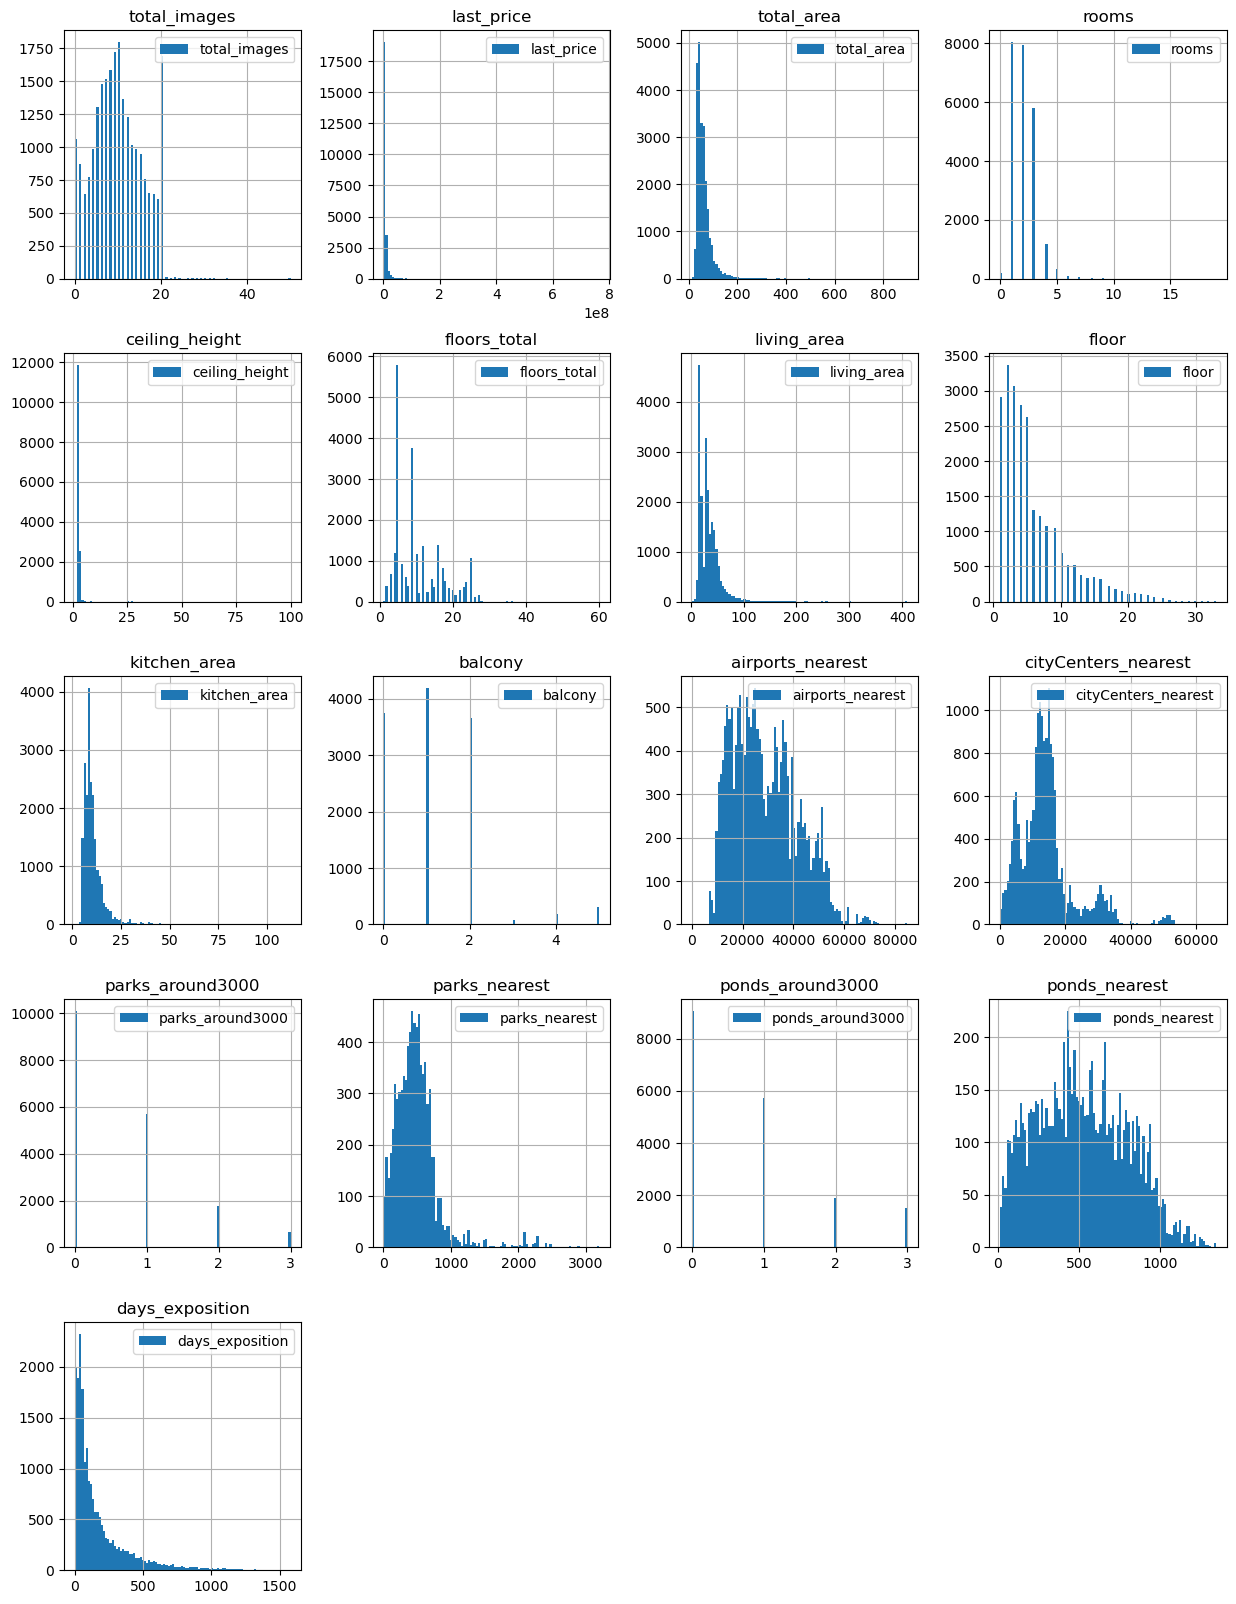

In [6]:
estate_data.hist(figsize = (15, 20), legend = True, bins = 100 )

## 2. Предобработка данных

### Определим в каких столбцах есть пропуски

In [7]:
estate_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
#Формируем первоначальный вывод
for column in estate_data.columns:
    #Количество пустых записей
    emptyRecords=len(estate_data.loc[estate_data[column].isnull()])
    if emptyRecords>0:
        print('- {} - содержит {} пропусков ({:.1%} от всех)'.format(column, emptyRecords, emptyRecords/estate_data.shape[0]))

- ceiling_height - содержит 9195 пропусков (38.8% от всех)
- floors_total - содержит 86 пропусков (0.4% от всех)
- living_area - содержит 1903 пропусков (8.0% от всех)
- is_apartment - содержит 20924 пропусков (88.3% от всех)
- kitchen_area - содержит 2278 пропусков (9.6% от всех)
- balcony - содержит 11519 пропусков (48.6% от всех)
- locality_name - содержит 49 пропусков (0.2% от всех)
- airports_nearest - содержит 5542 пропусков (23.4% от всех)
- cityCenters_nearest - содержит 5519 пропусков (23.3% от всех)
- parks_around3000 - содержит 5518 пропусков (23.3% от всех)
- parks_nearest - содержит 15620 пропусков (65.9% от всех)
- ponds_around3000 - содержит 5518 пропусков (23.3% от всех)
- ponds_nearest - содержит 14589 пропусков (61.6% от всех)
- days_exposition - содержит 3181 пропусков (13.4% от всех)


### Удаление/Замена пропусков

В колонке ponds_around3000 — число водоёмов в радиусе 3 км. Скорее всего не указанно число водоемов, потому что рядом вообще нет водоемов. Данные пропуски значений заменили на число 0.

In [9]:
estate_data['ponds_around3000'] = estate_data['ponds_around3000'].fillna(0)
print(estate_data['ponds_around3000'].isna().sum())
#print(estate_data['ponds_around3000'].hist(bins=20, figsize=(3, 3)))


0


В колонке parks_around3000 — число парков в радиусе 3 км. Скорее всего не указанно число парков, потому что рядом вообще нет парков. Данные пропуски значений заменили на число 0.

In [10]:
estate_data['parks_around3000'] = estate_data['parks_around3000'].fillna(0)
print(estate_data['parks_around3000'].isna().sum())
#print(estate_data['parks_around3000'].hist(bins=20, figsize=(3, 3)))

0


В колонке balcony — число балконов. Скорее всего не указанно число балконов, потому что в квартире их нет. Данные пропуски значений заменили на число 0.

In [11]:
estate_data['balcony'] = estate_data['balcony'].fillna(0)
print(estate_data['balcony'].isna().sum())
#print(estate_data['balcony'].hist(bins=20, figsize=(3, 3)))

0


В колонке is_apartment — апартаменты (булев тип). Квартир-апартаментов меньше, чем обычных жилых, значит будем считать, что все квартиры где не указано, что это апартаменты - апартаментами не являются.

In [12]:
estate_data['is_apartment'] = estate_data['is_apartment'].fillna(0)
print(estate_data['is_apartment'].isna().sum())
#print(estate_data['is_apartment'].hist(bins=20, figsize=(3, 3)))

0


В нашей таблице остались пропущенные значения в колонках:

• ceiling_height — высота потолков (м)

• floors_total — всего этажей в доме

• living_area — жилая площадь в квадратных метрах (м²)

• kitchen_area — площадь кухни в квадратных метрах (м²)

• locality_name — название населённого пункта

• airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

• cityCenters_nearest — расстояние до центра города (м)

• parks_nearest — расстояние до ближайшего парка (м)

• ponds_nearest — расстояние до ближайшего водоёма (м)

• days_exposition — сколько дней было размещено объявление (от публикации до снятия)

Заполнить нулевыми значениями такие калонки, как airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest. Так как эти значения, указанные в метрах, влияют на рыночную стоимость обьекта и могут исказить общие показатели стоимости жилья в разных населенных пунктах. Мы не можем указать тут ноль вместо пропуска -- это сильно исказит данные, как и не можем вписывать медиану поскольку не знаем насколько данные точны, есть ли выбросы и т.д. а если мы впишем ее, то получится, что все жители петербурга и области не указавшие расстояние до аэропорта или центра живут на одинаково расстоянии от центра\аэропорта.

Такие показатели как living_area, kitchen_area. Влиют на тип строения (многоквартирный дом или частный), а так же на год постройки дома. В разных домах разные типы планировки. Все это прямо сказывается на стоимость недвижимости.

Причины у большинства пропусков естественные, скорее всего поля в которых есть пропуски необязательны для публикации объявления в приложении, поэтому люди просто пропускают их. Либо это данные, которые сложно измерить например расстояние до центра, аэропорта, водоема или парка.

Мы можем заменить пропуски в колонке floors_total на медианное значение т.к. оно меньше подвержено выбросам и позволит нам поменять типа данных в столбце.

In [13]:
#estate_data['floors_total'] = estate_data['floors_total'].fillna(value=estate_data['floors_total'].median())

# Перебираем строки DataFrame с помощью iterrows().
for index, row in estate_data.iterrows():
    # Если floor больше, чем floors_total, или floors_total имеет значение NaN, то заменяем значение floors_total на floor.
    if row['floor'] > row['floors_total'] or pd.isna(row['floors_total']):
        # Прямое присваивание значения в DataFrame
        estate_data.at[index, 'floors_total'] = row['floor']

print(estate_data['floors_total'].isna().sum())
#print(estate_data['floors_total'].hist(bins=20, figsize=(3, 3)))

0


Название населенного пункта locality_name. Непосредственно влияет на стоимость жилья. Например жилье в Москве очевидно дороже, чем жилье в региональном городе. Число пропусков незначительно. Данные пропуски можно удалить

In [14]:
estate_data = estate_data.dropna(subset=['locality_name'])
print(estate_data['locality_name'].isna().sum())
#print(estate_data['locality_name'].hist(bins=20, figsize=(3, 3)))

0


Мы можем заменить пропуски в колонке ceiling_height на медианное значение т.к. оно меньше подвержено выбросам и позволит нам поменять типа данных в столбце.

In [15]:

estate_data['ceiling_height'] = estate_data['ceiling_height'].fillna(value=estate_data['ceiling_height'].median())
print(estate_data['ceiling_height'].isna().sum())


0


Для единообразия количество комнат для студий примем равным 0

In [16]:
estate_data['rooms']=estate_data['rooms'].where(~estate_data['studio'], 0)

Посмотрим в каких колонках еще остались пропущенные значения.

In [17]:
estate_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

### Заменим типы данных где это необходимо.

Проверяем типы данных

In [18]:
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Найдем столбцы, в которых нужно изменить тип данных.

Рассмотрев все колонки, мы видим что в ряде из них необходимо изменить тип данных.

Такие как:

floors_total — всего этажей в доме. Тип данных float64

balcony — число балконов. Тип данных float64

parks_around3000 — число парков в радиусе 3 км. Тип данных float64

ponds_around3000 — число водоёмов в радиусе 3 км. Тип данных float64

days_exposition — сколько дней было размещено объявление (от публикации до снятия). Тип данных float64

is_apartment — апартаменты (булев тип). Тип данных object

В колонках floors_total, balcony, parks_around3000, ponds_around3000, days_exposition необходимо заменить тип данных с float64 на int (Напр. не может быть 2.5 балкона и тд).

Колонку first_day_exposition, тип данных object нужно замерить на date.

Колонку is_apartment, тип данных object нужно замерить на bool.

Преобразуем тип данных в выбранных столбцах.

In [19]:
estate_data['is_apartment'] = estate_data['is_apartment'].astype('bool')
estate_data['floors_total'] = estate_data['floors_total'].astype('int')
estate_data['balcony'] = estate_data['balcony'].astype('int')
estate_data['parks_around3000'] = estate_data['parks_around3000'].astype('int')
estate_data['ponds_around3000'] = estate_data['ponds_around3000'].astype('int')
estate_data['first_day_exposition'] = pd.to_datetime(estate_data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
estate_data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0


Проверим данные таблицы.Все данные приведены к нужным типам.

In [20]:
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int32         
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

### Обрабаем аномальные значений

В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Рассмотрим данные в каждой колонке по отдельности.

**Цены на момент снятия с публикации (last_price) и общая площадь квартиры в квадратных метрах (м²) (total_area)**

Рассмотрим зависимость: 
last_price — цены на момент снятия с публикации и 
total_area — общей площадь квартиры в квадратных метрах (м²)


<Axes: xlabel='total_area', ylabel='last_price'>

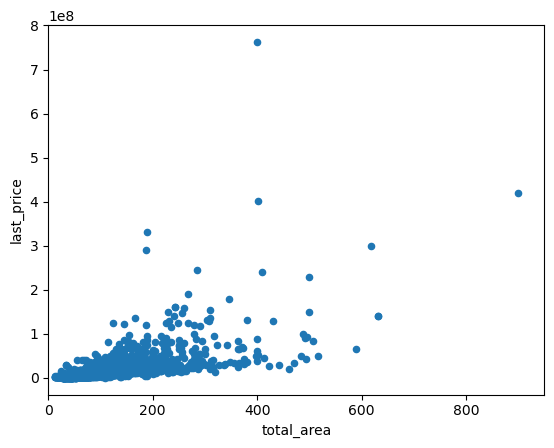

In [21]:
estate_data.plot(x='total_area', y='last_price', kind='scatter',xlim=(0, 950))

Из графика что оснавной диапазон цен на недвижимость находится в диапазоне общей площади квартиры до 450 м2 и цены на момент снятия с публикации до 200_000_000 руб.

Все отстальные позиции примем за аномальные и отбросим.


In [22]:
estate_data=estate_data.loc[(estate_data['total_area']<450) & (estate_data['last_price']<200_000_000)]

<Axes: xlabel='total_area', ylabel='last_price'>

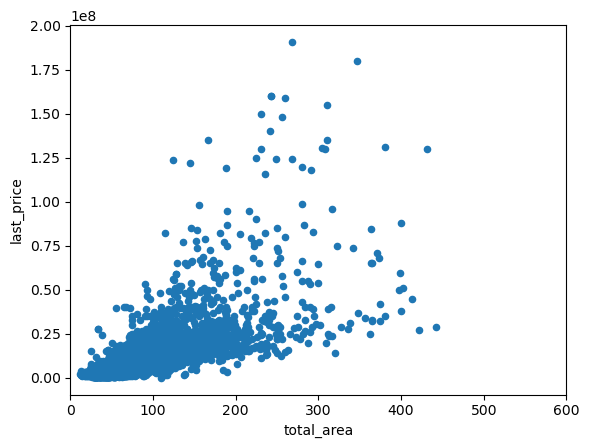

In [23]:
estate_data.plot(x='total_area', y='last_price', kind='scatter',xlim=(0, 600))

**Общая площадь квартиры в квадратных метрах (м²) (total_area)**

Построим гистограмму распределение общих площадей в квартирах отдельно.

23628

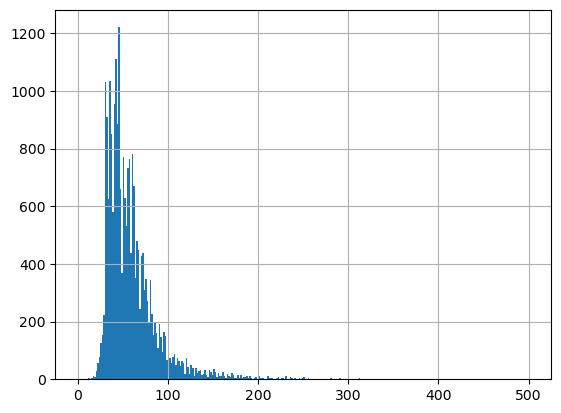

In [24]:
total_area_old_count = (estate_data['total_area'].count())
estate_data['total_area'].hist(bins=300, range=(0, 500));
total_area_old_count

In [25]:
print(estate_data['total_area'].describe())
print('Среднее значение:',estate_data['total_area'].mean())
print('Медианное значение:',estate_data['total_area'].median())

count    23628.000000
mean        59.934442
std         32.941473
min         12.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        441.980000
Name: total_area, dtype: float64
Среднее значение: 59.9344417640088
Медианное значение: 52.0


Имеет смысл удалить из датафрейма значения с нулевыми или близкими к нулю данными. На данном графике имеет смысл удаление квартир чья площадь более 200 м2

In [26]:
len(estate_data.query('total_area > 200'))

207

In [27]:
estate_data = estate_data.loc[estate_data['total_area'] <= 200]

In [28]:
total_area_new_count = (estate_data['total_area'].count())
total_area_new_count 

23421

In [29]:
dropped_total_area_count = ((total_area_old_count - total_area_new_count) / total_area_old_count) * 100
print(f'Процент отброшенных данных: {dropped_total_area_count:.2f}% ')

Процент отброшенных данных: 0.88% 


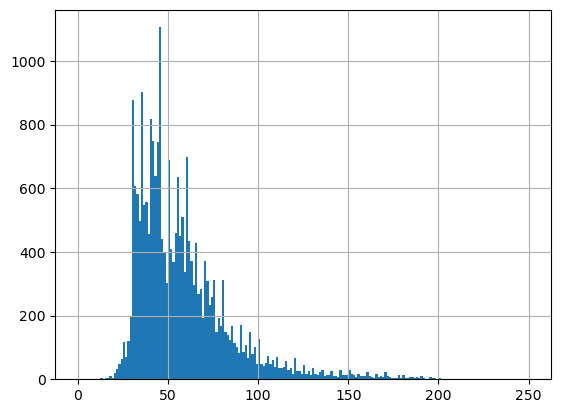

In [30]:
estate_data['total_area'].hist(bins=200, range=(0, 250));

**Цены на момент снятия с публикации (last_price)**

Построим гистограмму цен на момент снятия с публикации отдельно.

23421

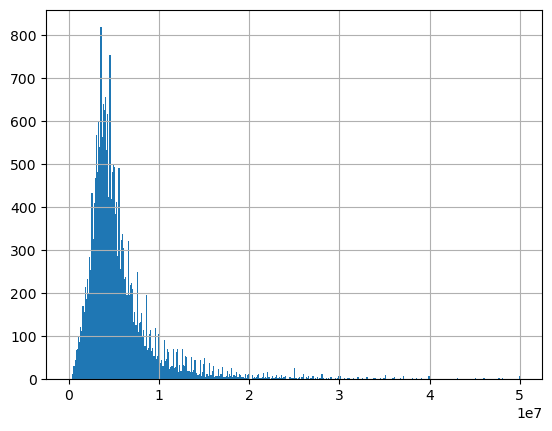

In [31]:
last_price_old_count = (estate_data['last_price'].count())
estate_data['last_price'].hist(bins=400, range=(0, 50_000_000))
last_price_old_count

In [32]:
print(estate_data['last_price'].describe())
print('Среднее значение:',estate_data['last_price'].mean())
print('Медианное значение:',estate_data['last_price'].median())

count    2.342100e+04
mean     5.998876e+06
std      5.571874e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      1.350000e+08
Name: last_price, dtype: float64
Среднее значение: 5998875.692668973
Медианное значение: 4600000.0


Имеет смысл удалить из датафрейма значения с нулевыми или близкими к нулю данными. На данном графике имеет смысл удаление квартир чья цена более 20_000_000 руб.

In [33]:
len(estate_data.query('last_price > 20_000_000'))

519

In [34]:
estate_data = estate_data.loc[estate_data['last_price'] <= 20_000_000]

In [35]:
last_price_new_count = (estate_data['last_price'].count())
last_price_new_count

22902

In [36]:
dropped_last_price_count = ((last_price_old_count - last_price_new_count) / last_price_old_count) * 100
print(f'Процент отброшенных данных: {dropped_last_price_count:.2f}% ')

Процент отброшенных данных: 2.22% 


<Axes: >

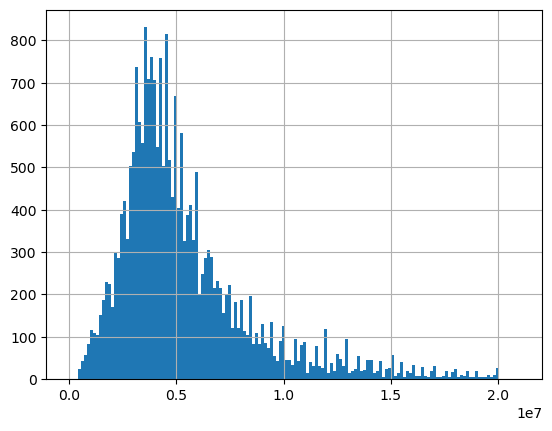

In [37]:
estate_data['last_price'].hist(bins=150, range=(0, 21_000_000))

**Высота потолков (м) (ceiling_height)**

Построим гистограмму на который увидим распределение кол-во квартир с разной высотой потолков

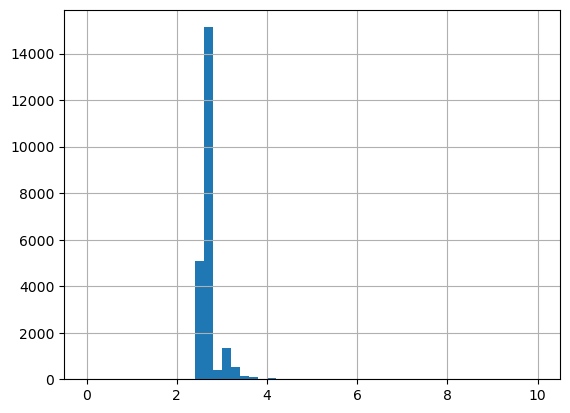

In [38]:
estate_data['ceiling_height'].hist(bins=50, range=(0, 10)); 

In [39]:
ceiling_height_old_count = (estate_data['ceiling_height'].count())
print(estate_data['ceiling_height'].describe())
print('Среднее значение:',estate_data['ceiling_height'].mean())
print('Медианное значение:',estate_data['ceiling_height'].median())

count    22902.000000
mean         2.714384
std          1.000585
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64
Среднее значение: 2.714384333246005
Медианное значение: 2.65


Из графика и описанных данных мы видим, что в списке присутствут квартиры с высотой потолка меньше 2.5 м. и больше 4 м. Данные квартиры можно выкинуть из общего списка данных.

In [40]:
len(estate_data.query('ceiling_height < 2.4'))

21

In [41]:
len(estate_data.query('ceiling_height > 4'))

59

In [42]:
estate_data = estate_data.loc[estate_data['ceiling_height'] >= 2]
estate_data = estate_data.loc[estate_data['ceiling_height'] <= 4]


In [43]:
ceiling_height_new_count = (estate_data['ceiling_height'].count())

In [44]:
dropped_ceiling_height_count = ((ceiling_height_old_count - ceiling_height_new_count) / ceiling_height_old_count) * 100
print(f'Процент отброшенных данных: {dropped_ceiling_height_count:.2f}% ')

Процент отброшенных данных: 0.27% 


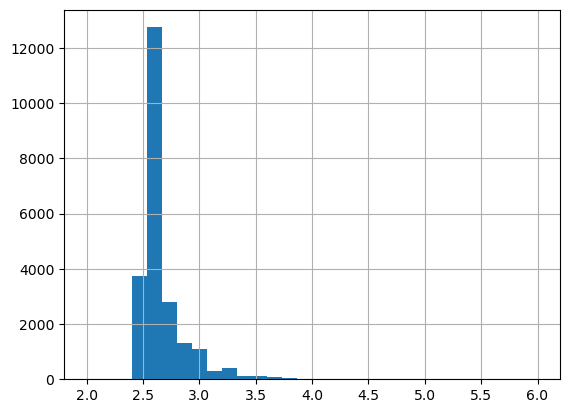

In [45]:
estate_data['ceiling_height'].hist(bins=30, range=(2, 6)); 

**Число комнат (rooms)**

Построим гистограмму на который увидим распределение кол-во числа комнат в квартирах.

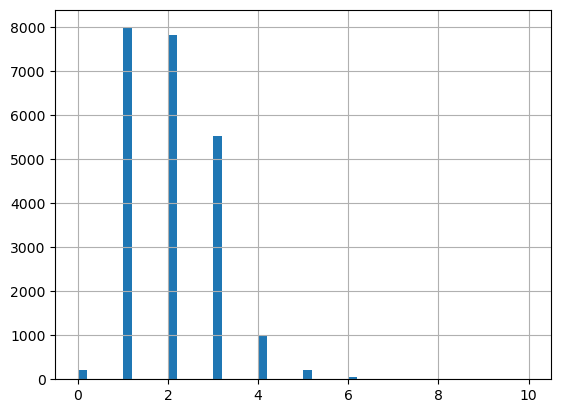

In [46]:
estate_data['rooms'].hist(bins=50, range=(0, 10)); 

In [47]:
rooms_old_count = (estate_data['rooms'].count())
print(estate_data['rooms'].describe())

count    22840.000000
mean         2.002145
std          0.971121
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64


Ранее мы присвоили количество комнат равное 0 - студиям, эти значения мы чистить не будем. Почистим колонку от квартир, где количество комнат более 6. Это конечно возможно, но таких кварир очень мало и их можно не учитывать в дальнйших расчетах. Так как они могут искажать общие показатели.

In [48]:
len(estate_data.query('rooms > 6'))

15

In [49]:
estate_data = estate_data.loc[estate_data['rooms'] <= 6]

In [50]:
rooms_new_count = (estate_data['rooms'].count())

In [51]:
dropped_rooms_count = ((rooms_old_count - rooms_new_count) / rooms_old_count) * 100
print(f'Процент отброшенных данных: {dropped_rooms_count:.2f}% ')

Процент отброшенных данных: 0.07% 


### Обработка дубликатов

Найдем все уникальные значения с названиями населенных пунктов.

In [52]:
print(f"Количество всех уникальных значений в столбце равно {estate_data['locality_name'].nunique()}.")
print('')
print(estate_data['locality_name'].unique())

Количество всех уникальных значений в столбце равно 362.

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Ни

Устраним неявные дубликаты в колонке с наазванием населенных пунктов.

В первую очередь заменим все синонимы и опечатки, но слово "посёлок" т.к. большое количетсво неявных дубликатов возникают именно иза за этого.

Далее заменим все населеные пункты городскаго типа, на аббревиатуру "ПГТ".

Тоже самое сделаем с всеми населенными пунктами типа - "Сады", на аббревиатуру "СНТ".

In [53]:
# не ясно почему, но если не создать копию DataFrame возникает ошибка
# SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
estate_data = estate_data.copy()

estate_data['locality_name'] = estate_data['locality_name'].str.replace('поселок|село|посёлок станции|деревня', 'посёлок', regex=True)
estate_data['locality_name'] = estate_data['locality_name'].str.replace('поселок городского типа|посёлок городского типа|городской посёлок', 'ПГТ', regex=True)
estate_data['locality_name'] = estate_data['locality_name'].str.replace('садовое товарищество|садоводческое некоммерческое товарищество', 'СНТ', regex=True)

In [54]:
print(f"Количество всех уникальных значений в столбце равно {estate_data['locality_name'].nunique()}.")
print('')
print(estate_data['locality_name'].unique())

Количество всех уникальных значений в столбце равно 315.

['Санкт-Петербург' 'посёлок Шушары' 'ПГТ Янино-1' 'посёлок Парголово'
 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин'
 'посёлок Кудрово' 'Коммунар' 'Колпино' 'ПГТ Красный Бор' 'Гатчина'
 'посёлок Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'посёлок Новое Девяткино' 'посёлок Металлострой' 'ПГТ Лебяжье'
 'ПГТ Сиверский' 'посёлок Молодцово' 'ПГТ Кузьмоловский' 'СНТ Новая Ропша'
 'Павловск' 'посёлок Пикколово' 'Всеволожск' 'Волхов' 'Кингисепп'
 'Приозерск' 'Сестрорецк' 'посёлок Куттузи' 'посёлок Аннино'
 'ПГТ Ефимовский' 'посёлок Плодовое' 'посёлок Заклинье'
 'посёлок Торковичи' 'посёлок Первомайское' 'Красное Село'
 'посёлок Понтонный' 'Сясьстрой' 'посёлок Старая' 'посёлок Лесколово'
 'посёлок Новый Свет' 'Сланцы' 'посёлок Путилово' 'Ивангород' 'Мурино'
 'Шлиссельбург' 'Никольское' 'Зеленогорск' 'Сосновый Бор' 'посёлок Оржицы'
 'посёлок Кальтино' 'Кудрово' 'посёлок Романовка' 'посёлок Бугры'
 'ПГТ Рощино' 'Кириши' 'Л

Теперь, когда мы исключили большинство дубликатов, создадим отдельный столбец в таблице и добавим туда все названия населенных пунктов без указания типа этих населенных пунктов, так будет проще понять какие значния дублируются и не придется перебирать весь список вручную.

In [55]:
"""
for i in estate_data['locality_name'].unique().tolist():
    estate_data.loc[estate_data['locality_name'] == i, 'locality_name'] = i.split()[-1] # оставляем только наименования населенного пункта
"""

# Создаём новый столбец с названиями населённых пунктов без указания их типа
estate_data['locality_cleaned'] = estate_data['locality_name'].apply(lambda x: x.split()[-1])

print(estate_data['locality_cleaned'].unique())
print(f"Количество всех уникальных значений в столбце равно {estate_data['locality_cleaned'].nunique()}.")

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино' 'Бор'
 'Гатчина' 'Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск' 'Девяткино'
 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово' 'Кузьмоловский' 'Ропша'
 'Павловск' 'Пикколово' 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск'
 'Сестрорецк' 'Куттузи' 'Аннино' 'Ефимовский' 'Плодовое' 'Заклинье'
 'Торковичи' 'Первомайское' 'Село' 'Понтонный' 'Сясьстрой' 'Старая'
 'Лесколово' 'Свет' 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург'
 'Никольское' 'Зеленогорск' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры'
 'Рощино' 'Кириши' 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж'
 'Копорье' 'Молодёжное' 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно'
 'Стрельна' 'Бокситогорск' 'Александровская' 'Лопухинка' 'Пикалёво'
 'Терволово' 'Советский' 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо'
 'Вырица' 'Кипень' 'Келози' 'Вартемяги' 'Тельмана' 'Севастьяново' 'Ижора'
 'Агалатово' 'Новогорелово' 

In [56]:
estate_data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_cleaned
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Шушары
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,...,9.10,0,ПГТ Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,Янино-1
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,...,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,Парголово
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,False,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,Санкт-Петербург
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,...,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.0,Мурино
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,Санкт-Петербург
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,...,8.50,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,Санкт-Петербург


### Вывод.

Для проверки того, что при предобработке данных отброшен допустимый процент данных, сравним количество строк в DataFrame до обработки (initial_row_count) и после обработки (final_row_count), вычислив долю удалённых данных.

In [57]:
final_row_count = estate_data.shape[0]
final_row_count

22825

Вычисляем процент отброшенных данных

In [58]:
dropped_percentage = ((initial_row_count - final_row_count) / initial_row_count) * 100
print(f"Процент отброшенных данных: {dropped_percentage:.2f}%")

Процент отброшенных данных: 3.69%


In [59]:
if dropped_percentage > 10:
    print("Предупреждение: было отброшено больше 10% данных!")
else:
    print("Потери данных находятся в пределах допустимого уровня.")

Потери данных находятся в пределах допустимого уровня.


[[<Axes: title={'center': 'total_images'}>
  <Axes: title={'center': 'last_price'}>
  <Axes: title={'center': 'total_area'}>
  <Axes: title={'center': 'first_day_exposition'}>]
 [<Axes: title={'center': 'rooms'}>
  <Axes: title={'center': 'ceiling_height'}>
  <Axes: title={'center': 'floors_total'}>
  <Axes: title={'center': 'living_area'}>]
 [<Axes: title={'center': 'floor'}>
  <Axes: title={'center': 'kitchen_area'}>
  <Axes: title={'center': 'balcony'}>
  <Axes: title={'center': 'airports_nearest'}>]
 [<Axes: title={'center': 'cityCenters_nearest'}>
  <Axes: title={'center': 'parks_around3000'}>
  <Axes: title={'center': 'parks_nearest'}>
  <Axes: title={'center': 'ponds_around3000'}>]
 [<Axes: title={'center': 'ponds_nearest'}>
  <Axes: title={'center': 'days_exposition'}> <Axes: > <Axes: >]]


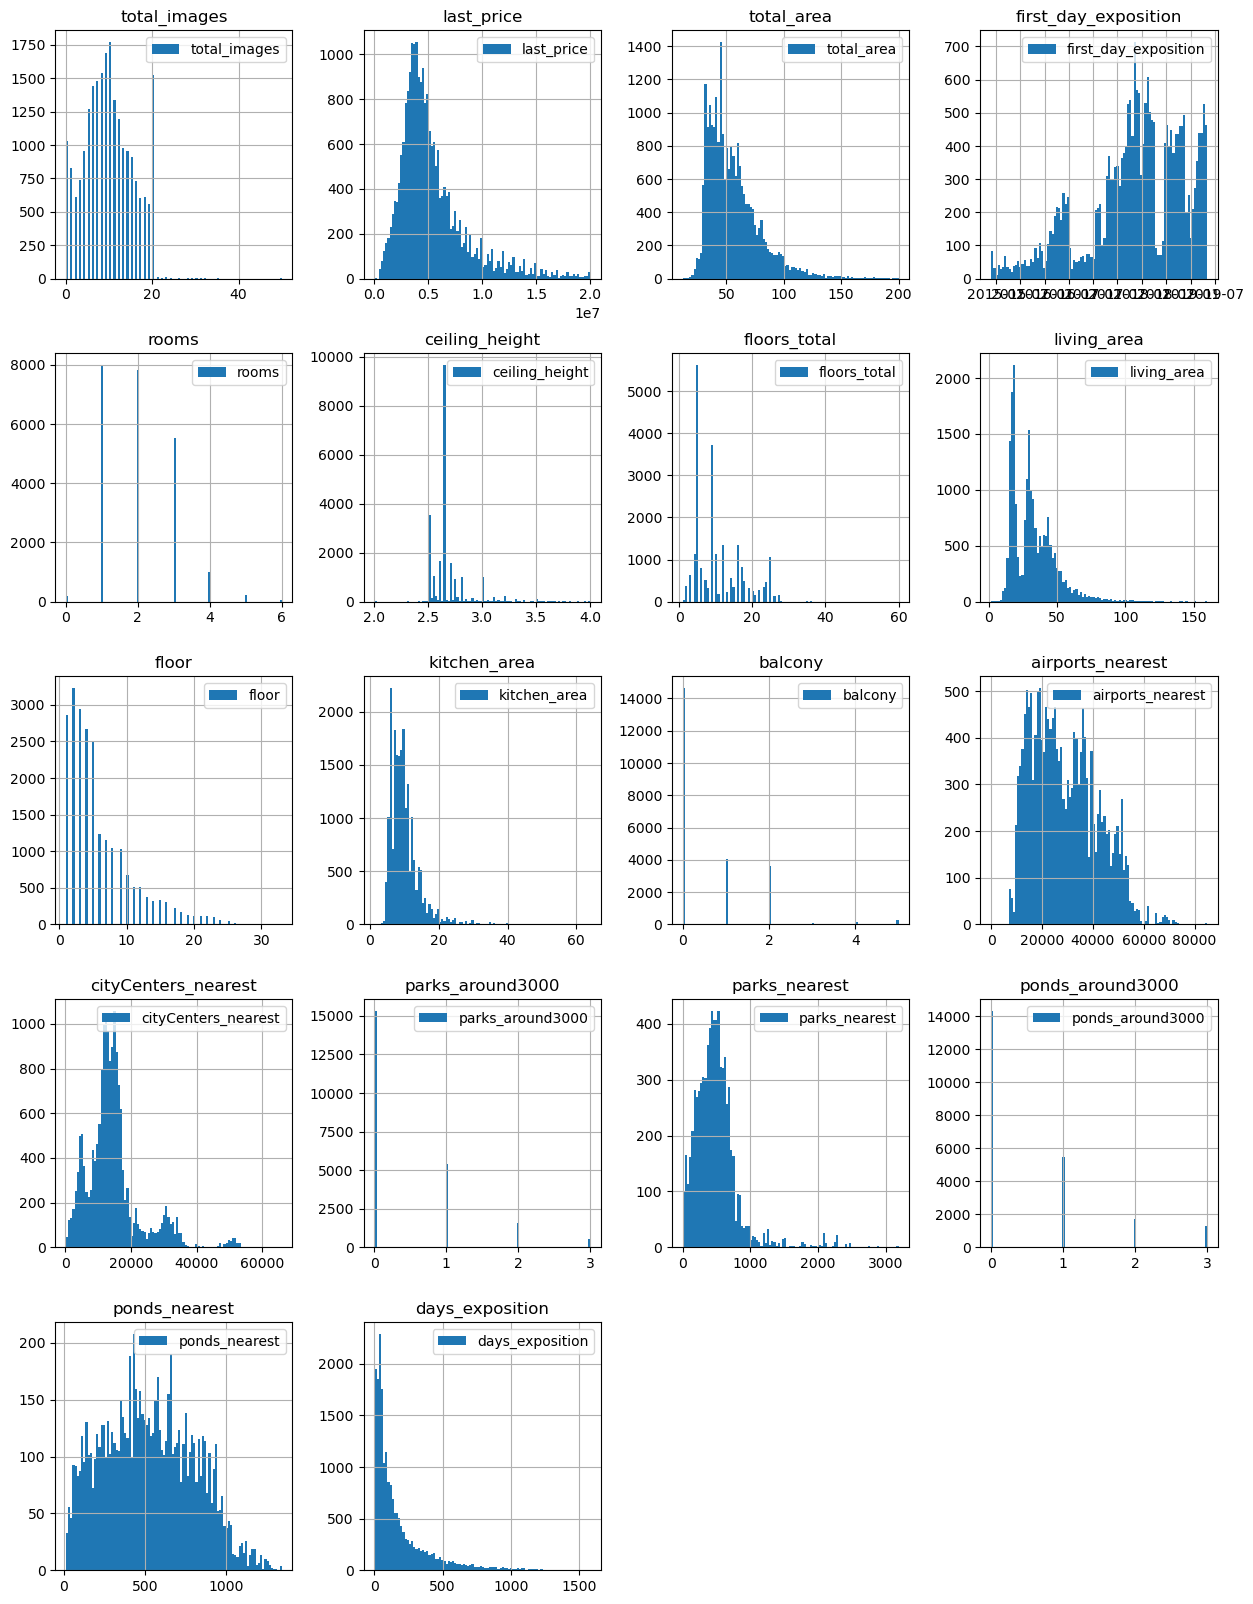

In [60]:
print(estate_data.hist(figsize = (15, 20), legend = True, bins = 100 ))

Мы выполнили предобработку данных. Выявили в датафрейме пропущенные значения и заполнили их там где это представляется возможным, не исказив данные. Исправили типы данных на подходящие. Обработали аномальные значения. Обработали дубликаты. Итого было отброшено около 5% мусорных данных.

Нам удалось сохранить большую часть датафрейма, графики стали заметно лучше, всплески, которые видны на них связаны с типовой застройкой, поэтому некоторые цифры появляются в датасете чаще других.

## 3. Добавим в таблицу новые столбцы со следующими параметрами:

Посчитаем и добавим в каждую ячейку таблицы, цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);

In [61]:
estate_data['price_for_one_meter'] = round(estate_data['last_price'] / estate_data['total_area'], 2)
estate_data.head(5)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_cleaned,price_for_one_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,...,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Шушары,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург,92785.71
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург,100000.00
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,...,0,ПГТ Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,Янино-1,95065.79


Добавим в таблицу день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [62]:
estate_data['day_of_the_week_publ'] = pd.DatetimeIndex(estate_data['first_day_exposition']).dayofweek
estate_data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_cleaned,price_for_one_meter,day_of_the_week_publ
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург,120370.37,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,...,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Шушары,82920.79,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург,92785.71,3
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург,100000.00,1
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,...,ПГТ Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,Янино-1,95065.79,0


Добавим в таблицу месяц публикации объявления;

In [63]:
estate_data['month_publ'] = pd.DatetimeIndex(estate_data['first_day_exposition']).month
estate_data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_cleaned,price_for_one_meter,day_of_the_week_publ,month_publ
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,...,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург,120370.37,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,...,12817.0,18603.0,0,NaN,0,NaN,81.0,Шушары,82920.79,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,...,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург,92785.71,3,8
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,...,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург,100000.00,1,6
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,...,NaN,NaN,0,NaN,0,NaN,55.0,Янино-1,95065.79,0,9


Добавим в таблицу год публикации объявления;

In [64]:
estate_data['year_publ'] = pd.DatetimeIndex(estate_data['first_day_exposition']).year
estate_data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_cleaned,price_for_one_meter,day_of_the_week_publ,month_publ,year_publ
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,...,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,...,18603.0,0,NaN,0,NaN,81.0,Шушары,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,...,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,...,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург,100000.00,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,...,NaN,0,NaN,0,NaN,55.0,Янино-1,95065.79,0,9,2018


Добавим в таблицу тип этажа квартиры (значения — «первый», «последний», «другой»);

In [65]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

# Применение функции к DataFrame для создания нового столбца
estate_data['floor_type'] = estate_data.apply(floor_type, axis=1)
estate_data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_cleaned,price_for_one_meter,day_of_the_week_publ,month_publ,year_publ,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,...,1,482.0,2,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,...,0,NaN,0,NaN,81.0,Шушары,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,...,1,90.0,2,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,...,2,112.0,1,48.0,121.0,Санкт-Петербург,100000.00,1,6,2018,другой
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,...,0,NaN,0,NaN,55.0,Янино-1,95065.79,0,9,2018,другой


Добавим в таблицу расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [66]:
estate_data['cityCenters_nearest_km'] = (estate_data['cityCenters_nearest'] / 1000).round()
estate_data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_cleaned,price_for_one_meter,day_of_the_week_publ,month_publ,year_publ,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,...,482.0,2,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,...,NaN,0,NaN,81.0,Шушары,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,...,90.0,2,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015,другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,...,112.0,1,48.0,121.0,Санкт-Петербург,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,...,NaN,0,NaN,55.0,Янино-1,95065.79,0,9,2018,другой,NaN


## 4. Проведем исследовательский анализ данных

### Изучим перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров.

 В некоторых параметрах встречаются редкие и выбивающиеся значения. При построении гистограмм удалите их. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах, если они есть. Если природа аномалии понятна и данные действительно искажены, то восстановите    корректное значение. В противном случае удалите редкие и выбивающиеся значения.

**Список параметров:**

**Общая площадь квартиры в квадратных метрах (м²) (total_area)**

Построим гистограмму на который увидим распределение общих площадей в квартирах.

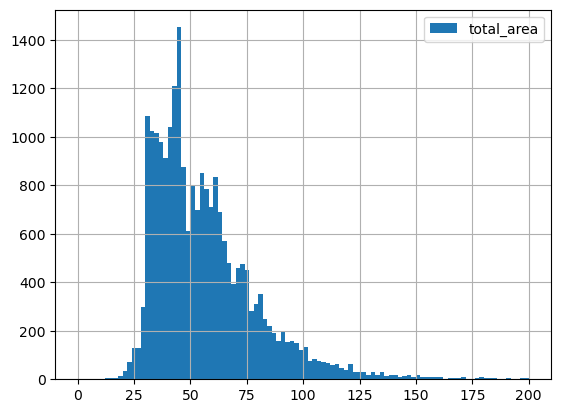

In [67]:
estate_data['total_area'].hist(bins=100, range=(0, 200), legend = True); 

In [68]:
print(estate_data['total_area'].describe())
print('Среднее значение:',estate_data['total_area'].mean())
print('Медианное значение:',estate_data['total_area'].median())

count    22825.000000
mean        56.290935
std         23.368006
min         12.000000
25%         40.000000
50%         51.000000
75%         67.000000
max        200.000000
Name: total_area, dtype: float64
Среднее значение: 56.29093493975904
Медианное значение: 51.0


В разделе предобработка данных были отброщены квартиры с огромными площадями. В следствии сего график сейчас выглядит более читаемым. В целом можно сказать, что значения примерно те же.

**Жилая площадь в квадратных метрах (м²) (living_area)**

Построим гистограмму на который увидим распределение жилых площадей в квартирах.

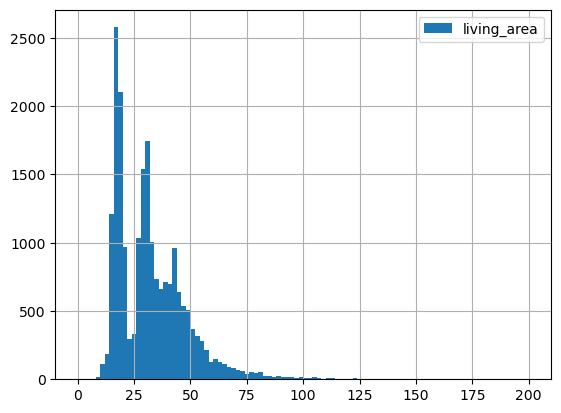

In [69]:
estate_data['living_area'].hist(bins=100, range=(0, 200), legend = True); 


In [70]:
print(estate_data['living_area'].describe())
print('Среднее значение:',estate_data['living_area'].mean())
print('Медианное значение:',estate_data['living_area'].median())

count    21032.000000
mean        32.279700
std         15.863823
min          2.000000
25%         18.400000
50%         30.000000
75%         41.100000
max        159.600000
Name: living_area, dtype: float64
Среднее значение: 32.27969957740586
Медианное значение: 30.0


Из графика мы видим, что наибольшее число квартир Это квартиры площадью примерно 20 м2, которые являются студиями. 
Второй всплеск находится в диапазоне 30-40 м2. Это однокомнатные квартиры.
Можно сделать вывод что самые популярные квартиры на рынке это студии и однушки.

**Площадь кухни в квадратных метрах (м²) (kitchen_area)**

Построим гистограмму на который увидим распределение площадей кухни в квартирах.

(5.0, 12.5)

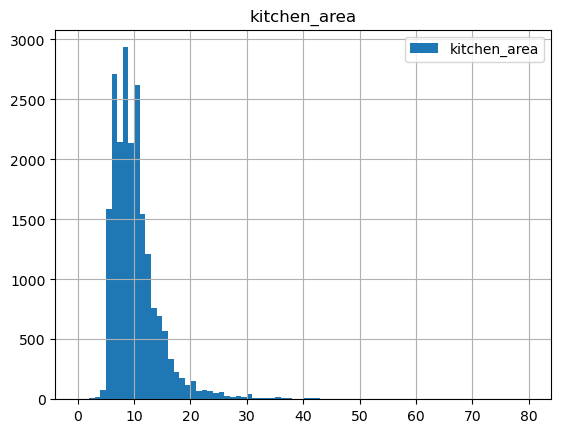

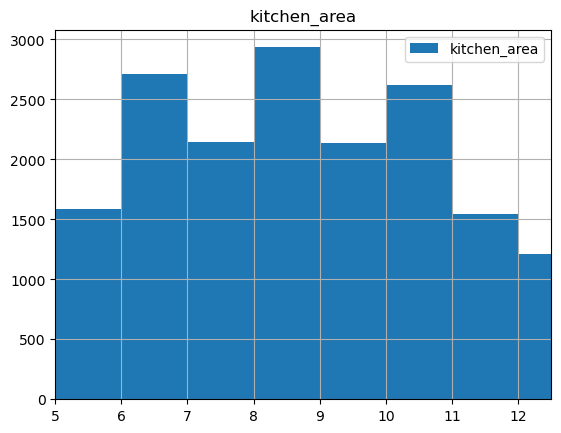

In [71]:
estate_data.hist(column = 'kitchen_area', bins=80, range=(0, 80), legend = True)
estate_data.hist(column = 'kitchen_area', bins=80, range=(0, 80), legend = True)
plt.xlim(5, 12.5)

In [72]:
print(estate_data['kitchen_area'].describe())
print('Среднее значение:',estate_data['kitchen_area'].mean())
print('Медианное значение:',estate_data['kitchen_area'].median())

count    20654.000000
mean        10.083388
std          4.640804
min          1.300000
25%          7.000000
50%          9.000000
75%         11.500000
max         64.000000
Name: kitchen_area, dtype: float64
Среднее значение: 10.08338772150673
Медианное значение: 9.0


<Axes: >

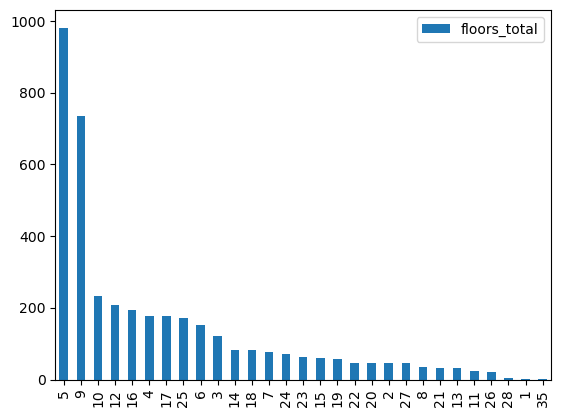

In [73]:
estate_data.query('8 < kitchen_area < 10 ')['floors_total'].value_counts().plot(kind = 'bar', legend = True)

Видно что кухонь площадью 8-10 м2., больше всего в 5 и 9 этажных домах.

**Цена на момент снятия с публикации (last_price)**

Построим гистограмму на который увидим распределение Цены на момент снятия с публикации.

<Axes: >

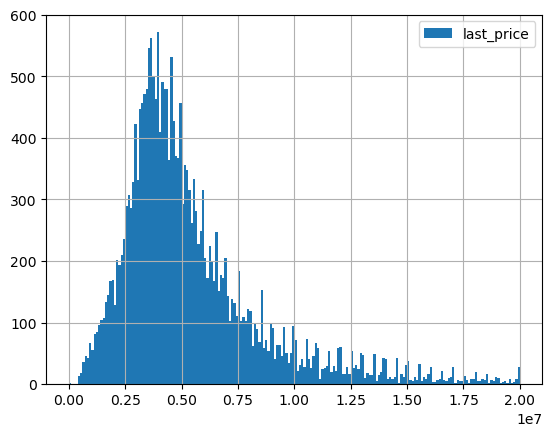

In [74]:
estate_data['last_price'].hist(bins=200, range=(0, 20_000_000), legend = True)

In [75]:
print(estate_data['last_price'].describe())
print('Среднее значение:', "{:.2f}".format(estate_data['last_price'].mean()/ 1_000_000), 'млн. руб.')
print('Медианное значение:', "{:.2f}".format(estate_data['last_price'].median()/ 1_000_000), 'млн. руб.')

count    2.282500e+04
mean     5.390525e+06
std      3.171325e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.550000e+06
75%      6.498000e+06
max      2.000000e+07
Name: last_price, dtype: float64
Среднее значение: 5.39 млн. руб.
Медианное значение: 4.55 млн. руб.


**Число комнат (rooms)**

Построим гистограмму на который увидим распределение числа комнат.

<Axes: >

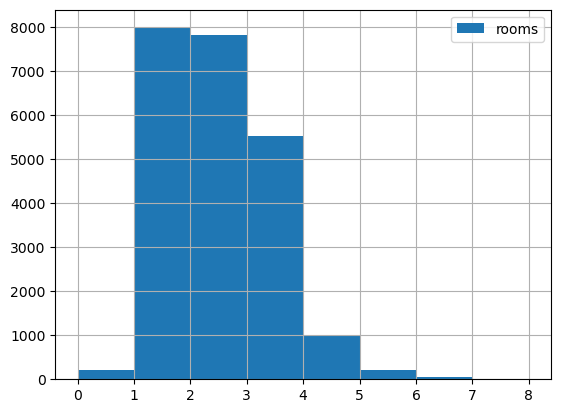

In [76]:
estate_data['rooms'].hist(bins=8, range=(0, 8), legend = True)

In [77]:
print(estate_data['rooms'].describe())
print('Среднее значение:',estate_data['rooms'].mean())
print('Медианное значение:',estate_data['rooms'].median())

count    22825.000000
mean         1.998642
std          0.961422
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64
Среднее значение: 1.9986418400876231
Медианное значение: 2.0


In [78]:
print('Всего квартир с 0 комнат:',len(estate_data.query('rooms < 1')))
print('Из них студий:',estate_data.query('rooms < 1')['studio'].value_counts())

Всего квартир с 0 комнат: 205
Из них студий: True     148
False     57
Name: studio, dtype: int64


**Высота потолков (м) (ceiling_height)**

Построим гистограмму на который увидим распределение высоты потолков в квартирах.

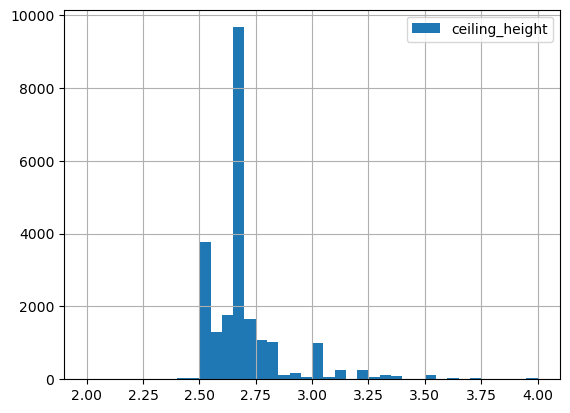

In [79]:
estate_data['ceiling_height'].hist(bins=40, range=(2, 4), legend = True); 

In [80]:
print(estate_data['ceiling_height'].describe())
print('Среднее значение:',estate_data['ceiling_height'].mean())
print('Медианное значение:',estate_data['ceiling_height'].median())

count    22825.000000
mean         2.683530
std          0.190387
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64
Среднее значение: 2.683530339539978
Медианное значение: 2.65


Из графика видим, что квартиры с высотой потолка 2.6-2.7 м. самые распространенные на рынке - это дома относительно современных типов строительства.
Квартиры с высотой потолка 2.5 м. вторые по количеству - это панельные дома.
Так же видим небольшой всплеск значение с высотой потолка 3 м. - это старые дома, так называемые сталинки.

**Тип этажа квартиры («первый», «последний», «другой») (floor_type)**

Построим гистограмму на который увидим распределение типа этажа квартиры.

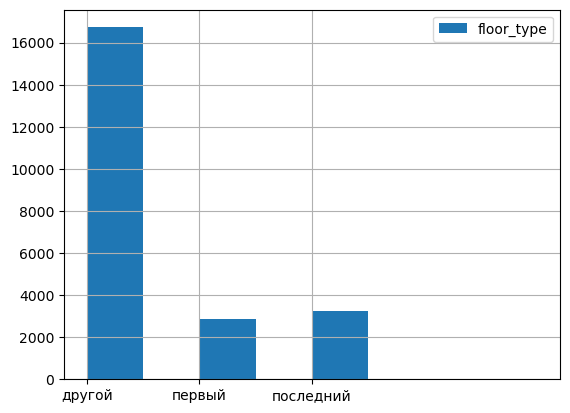

In [81]:
estate_data['floor_type'].hist(bins=8, range=(0, 4), legend = True); 

In [82]:
print(estate_data['floor_type'].describe())

count      22825
unique         3
top       другой
freq       16730
Name: floor_type, dtype: object


Большинство квартир, как и ожидалось, расположены не на первом и не на втором этаже. А квартир расположенных на первом и последнем этажах практически одинаковое количество.

**Всего этажей в доме (floors_total)**

Построим гистограмму на который увидим распределение этажей в доме.

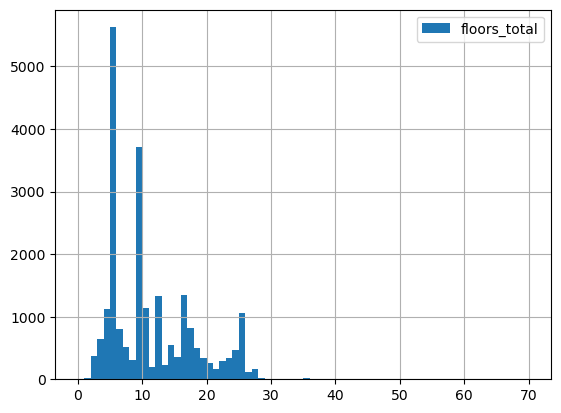

In [83]:
estate_data['floors_total'].hist(bins=70, range=(0, 70), legend = True); 

In [84]:
print(estate_data['floors_total'].describe())
print('Среднее значение:',estate_data['floors_total'].mean())
print('Медианное значение:',estate_data['floors_total'].median())

count    22825.000000
mean        10.755181
std          6.626039
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64
Среднее значение: 10.755180722891566
Медианное значение: 9.0


5     5625
9     3717
16    1344
12    1336
10    1139
4     1131
25    1061
17     818
6      796
3      640
14     549
7      512
18     498
24     461
2      367
15     352
23     344
19     334
8      312
22     286
20     263
13     222
11     190
27     164
21     162
26     122
1       28
35      24
28      21
36       2
34       1
60       1
29       1
33       1
52       1
Name: floors_total, dtype: int64

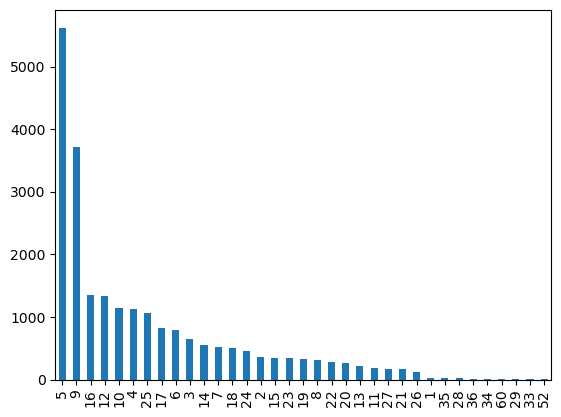

In [85]:
estate_data['floors_total'].value_counts().plot(kind = 'bar')
estate_data['floors_total'].value_counts()

Как мы ранее обнаружили, обьявление чаще всего встречаются в 5 этажных домах - 5625 обьявлений. Второе по числу обьявлений - это 9 этажные дома - 3717 обьявлений. Графиком выше мы это подтверждаем.

**Расстояние до центра города (м) (cityCenters_nearest)**

Построим гистограмму расстояния квартир до центра города.

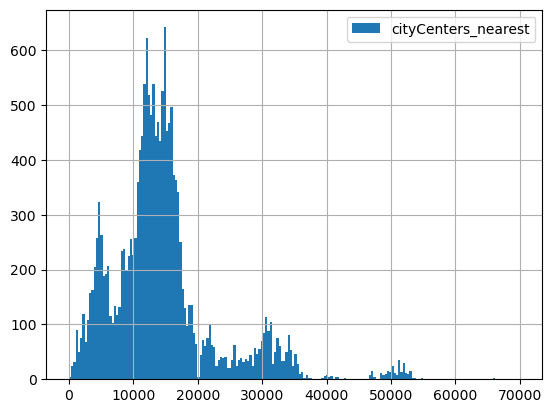

In [86]:
estate_data['cityCenters_nearest'].hist(bins=200, range=(0, 70000), legend = True); 

In [87]:
print(estate_data['cityCenters_nearest'].describe())
print('Среднее значение:',estate_data['cityCenters_nearest'].mean())
print('Медианное значение:',estate_data['cityCenters_nearest'].median())

count    17347.000000
mean     14533.548106
std       8564.503954
min        208.000000
25%       9877.000000
50%      13298.000000
75%      16465.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64
Среднее значение: 14533.548106300801
Медианное значение: 13298.0


Строим гистограмму, медианное удаление от центра города - 13298.0
метров или 13-14 км. Видим небольшой всплеск до 10000 м он небольшой т.к. недвижимость в центре продается быстрее поэтому ее немного, но всплеск есть т.к. близкое расположение к центру является преимуществом. Далее идет промежуток от 10000 до 20000 метров на нем расположено большинство квартир, что является нормальным распределением. Далее идет необычный всплеск в районе от 25000 до 35000, строим гистограмму по этому промежутку и видим, что на это расстоянии расположено несколько поселков или городов, именно из за этого возникает неровность на графике.

<Axes: >

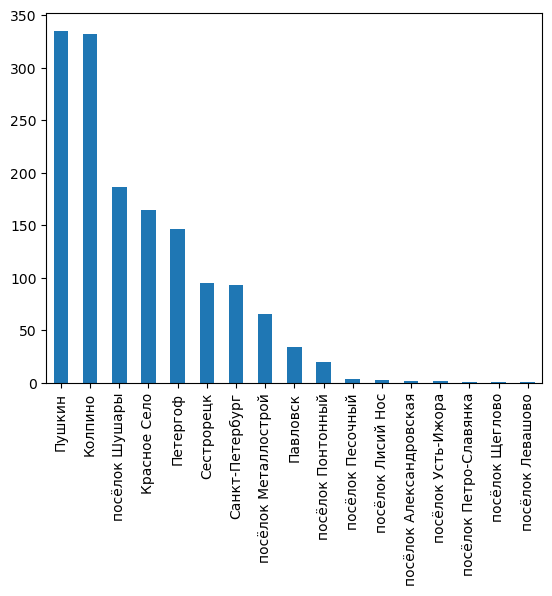

In [88]:
estate_data.query('25000< cityCenters_nearest < 35000')['locality_name'].value_counts().plot(kind = 'bar')

**Расстояние до ближайшего парка (м) (parks_nearest)**

Построим гистограмму расстояния квартир до ближайшего парка.

<Axes: >

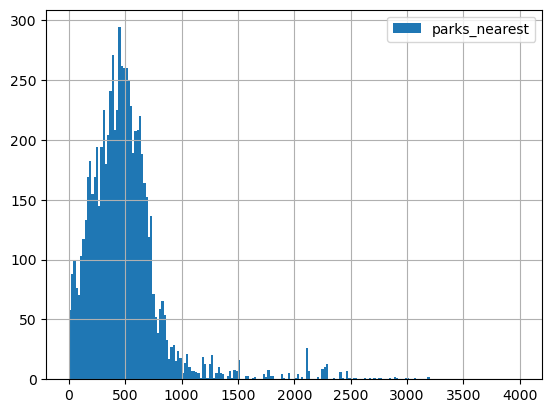

In [89]:
estate_data['parks_nearest'].hist(bins=200, range=(0, 4000), legend = True) 

In [90]:
print(estate_data['parks_nearest'].describe())
print('Среднее значение:',estate_data['parks_nearest'].mean())
print('Медианное значение:',estate_data['parks_nearest'].median())

count    7500.000000
mean      493.775200
std       342.679107
min         1.000000
25%       289.000000
50%       456.000000
75%       615.000000
max      3190.000000
Name: parks_nearest, dtype: float64
Среднее значение: 493.7752
Медианное значение: 456.0


Видим практически идеальное рапсределение, медианное расстояние до парка - 456 метров, большинство людей предпочитают не указывать расстояние до парка если оно больше 1км.

### Изучим, как быстро продавались квартиры (столбец days_exposition).

Построим гистограмму и узнаем сколько дней было размещено объявление (от публикации до снятия).

(0.0, 200.0)

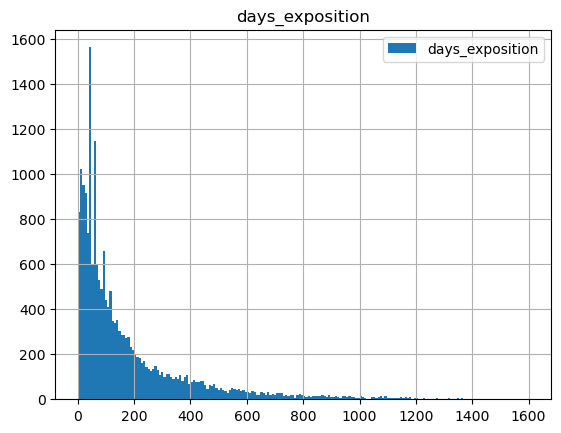

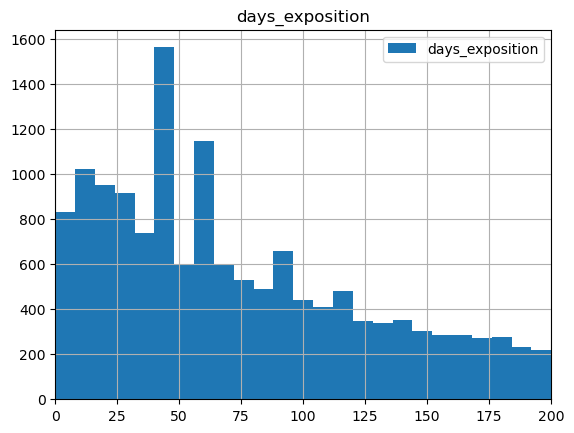

In [91]:
estate_data.hist(column = 'days_exposition', bins=200, range=(0, 1600), legend = True)
estate_data.hist(column = 'days_exposition', bins=200, range=(0, 1600), legend = True)
plt.xlim(0, 200)

In [92]:
print(estate_data['days_exposition'].describe())
print('Среднее значение:',estate_data['days_exposition'].mean())
print('Медианное значение:',estate_data['days_exposition'].median())

count    19868.000000
mean       177.522599
std        216.249527
min          1.000000
25%         44.000000
50%         93.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64
Среднее значение: 177.52259915441917
Медианное значение: 93.0


Из графика видно.

Среднее значение (177.52 дня): Среднее количество дней экспозиции немного завышено по сравнению с медианой. Это может быть связано с выбросами, т.е. с очень долгими периодами продажи некоторых квартир, которые влияют на среднее значение.

Медиана (93 дня): Медиана, как более устойчивая к выбросам мера центральной тенденции, показывает, что 50% квартир продавались за срок менее 93 дней, что может быть более репрезентативным значением для среднего периода продажи.

Стандартное отклонение (216.25 дня): Большое стандартное отклонение указывает на значительный разброс данных, т.е. есть квартиры, которые продавались как очень быстро (1 день), так и очень медленно (1580 дней).


**Вывод:**

Среднее и медиана сильно различаются, что указывает на наличие выбросов, которые искажают среднее значение. 

Медиана может быть лучшей характеристикой для описания типичного времени продажи квартиры, поскольку она меньше подвержена влиянию выбросов.

Продажа квартир в периоде первого квартиля 25% за 44 дня или меньше. Мы можем назвать такие продажи относительно быстрыми.

Продажа квартир в периоде третьего квартиля 75% за 226  дня. Продажи, которые занимают дольше этого срока, можно считать необычно долгими.

### Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.

Для анализа, влияния стоимости объекта недвижимости, и построения графиков зависимости цены от различных параметров, выполним несколько шагов. Используем сводные таблицы для подготовки данных и построим соответствующие визуализации. Это позволит нам определить наиболее значимые факторы.

**Зависимость цены от общей площади**

Создадим сводную таблицу, которая покажет медианную цену для различных диапазонов общей площади.

In [93]:
# Создание сводной таблицы для медианной цены по общей площади
pivot_total_area_price = estate_data.pivot_table(index='total_area', values='last_price', aggfunc='median').reset_index()

# Просмотр первых значений
pivot_total_area_price.head(10)


,total_area,last_price
0,12.0,2400000.0
1,13.0,1850000.0
2,13.2,1686000.0
3,14.0,1190000.0
4,15.0,1725000.0
5,15.5,2450000.0
6,16.0,2100000.0
7,17.0,1700000.0
8,17.2,2050000.0
9,17.6,3400000.0


Построим точечный график, где отобразим зависимость медианной цены от общей площади.

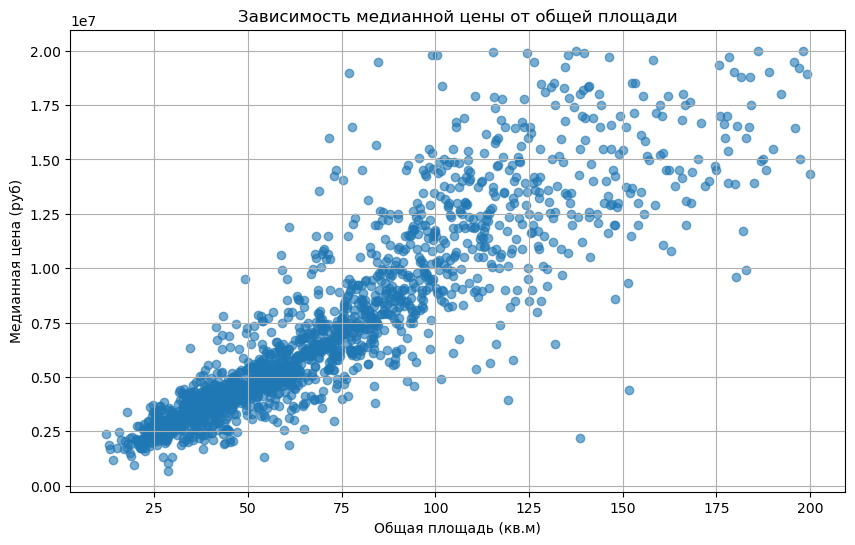

In [94]:
# Подсмотрел это в инете!!!
# Построение точечного графика
plt.figure(figsize=(10, 6))
plt.scatter(
    pivot_total_area_price['total_area'], 
    pivot_total_area_price['last_price'], 
    alpha=0.6  
)
plt.title('Зависимость медианной цены от общей площади')
plt.xlabel('Общая площадь (кв.м)')
plt.ylabel('Медианная цена (руб)')
plt.grid(True)
plt.show()

In [95]:
print(pivot_total_area_price['total_area'].corr(pivot_total_area_price['last_price']))

0.8922367186983787


Согласно значениям площадей кватир к медианной стоимости. 
Мы видим, что в основной диапазон цен расплоложен в пределах от 2,5 до 10 млн. руб.

Так же из графика выше мы видим, что с ростом total_area растёт last_price, коэффициент корреляции Пирсона — положительный. Следовательно зависимость роста цены от общей площади прямая.

**Зависимость цены от жилой площади**

Создадим сводную таблицу, которая покажет медианную цену для различных диапазонов жилой площади.

In [96]:
# Создание сводной таблицы для медианной цены по жилой площади
pivot_living_area_price = estate_data.pivot_table(index='living_area', values='last_price', aggfunc='median').reset_index()

# Просмотр первых значений
pivot_living_area_price.head(10)

,living_area,last_price
0,2.0,4340000.0
1,3.0,4440000.0
2,5.0,2680000.0
3,5.4,6100000.0
4,6.0,3799000.0
5,6.5,4050000.0
6,8.0,6850000.0
7,8.3,4000000.0
8,8.4,4200000.0
9,8.5,4100000.0


Построим точечный график, где отобразим зависимость медианной цены от жилой площади.

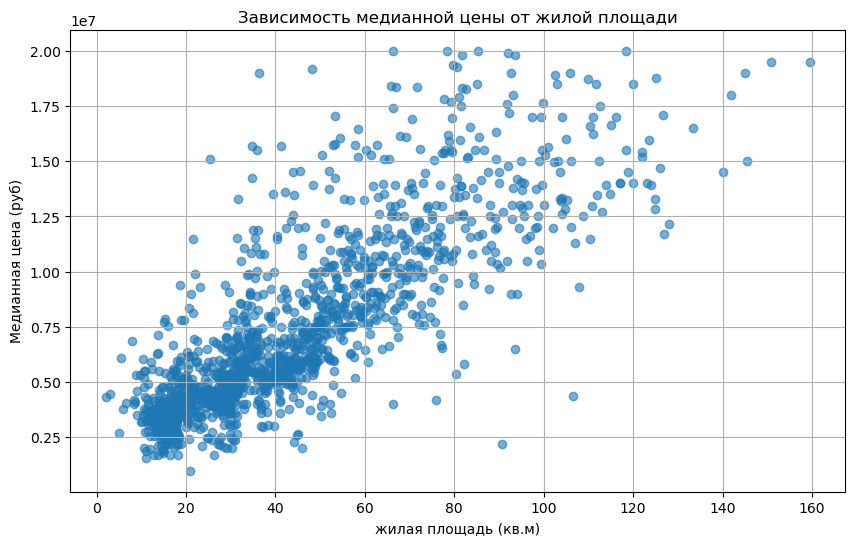

In [97]:
# Построение точечного графика
plt.figure(figsize=(10, 6))
plt.scatter(
    pivot_living_area_price['living_area'], 
    pivot_living_area_price['last_price'], 
    alpha=0.6  
)
plt.title('Зависимость медианной цены от жилой площади')
plt.xlabel('жилая площадь (кв.м)')
plt.ylabel('Медианная цена (руб)')
plt.grid(True)
plt.show()

In [98]:
print(pivot_living_area_price['living_area'].corr(pivot_living_area_price['last_price']))

0.8263572496133301


Согласно значениям жилой площадей кватир к медианной стоимости. 
Мы видим, что график ведет себя похожим образом как и график значений общей площади квартир.
Основной диапазон цен расплоложен в пределах от 2,5 до 10 млн. руб.

Так же из графика выше мы видим, что с ростом living_area растёт last_price, коэффициент корреляции Пирсона — положительный. Следовательно зависимость роста цены от общей площади прямая.

**Зависимость цены от площади кухни**

Создадим сводную таблицу, которая покажет медианную цену для различных диапазонов площади кухни.

In [99]:
# Создание сводной таблицы для медианной цены по площади кухни
pivot_kitchen_area_price = estate_data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').reset_index()

# Просмотр первых значений
pivot_kitchen_area_price.head(10)

,kitchen_area,last_price
0,1.30,4250000.0
1,2.00,2720000.0
2,2.30,2940000.0
3,2.40,2200000.0
4,2.89,5967734.0
5,3.00,3180000.0
6,3.20,6000000.0
7,3.30,3900000.0
8,3.40,3700000.0
9,3.50,4275000.0


Построим точечный график, где отобразим зависимость медианной цены от жилой площади.

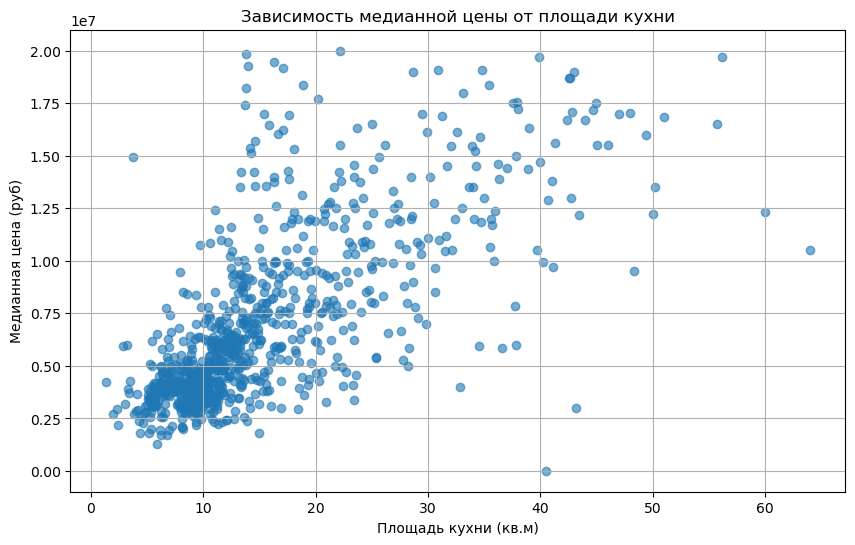

In [100]:
# Построение точечного графика
plt.figure(figsize=(10, 6))
plt.scatter(
    pivot_kitchen_area_price['kitchen_area'], 
    pivot_kitchen_area_price['last_price'], 
    alpha=0.6  
)
plt.title('Зависимость медианной цены от площади кухни')
plt.xlabel('Площадь кухни (кв.м)')
plt.ylabel('Медианная цена (руб)')
plt.grid(True)
plt.show()

In [101]:
print(pivot_kitchen_area_price['kitchen_area'].corr(pivot_kitchen_area_price['last_price']))

0.702143326625034


Согласно значениям площиди кухни к медианной стоимости. Мы видим, что график ведет себя похожим образом как и график значений общей площади квартиры, так и жилой площади. Основной диапазон цен расплоложен в пределах от 2,5 до 10 млн. руб.

Так же из графика выше мы видим, что с ростом kitchen_area растёт last_price, коэффициент корреляции Пирсона — положительный, хотя все же чуть меньше чем на предыдущих графиках. Следовательно зависимость роста цены от общей площади прямая.

**Зависимость цены от количества комнат**

Создадим сводную таблицу, которая покажет зависимость медианной цены от количества комнат.

In [102]:
# Создание сводной таблицы для медианной цены по площади кухни
pivot_rooms_price = estate_data.pivot_table(index='rooms', values='last_price', aggfunc='median').reset_index()

# Просмотр первых значений
pivot_rooms_price.head(10)

,rooms,last_price
0,0,2700000.0
1,1,3600000.0
2,2,4750000.0
3,3,6000000.0
4,4,8050000.0
5,5,10995000.0
6,6,13000000.0


Построим точечный график, где отобразим зависимость медианной цены от количества комнат.

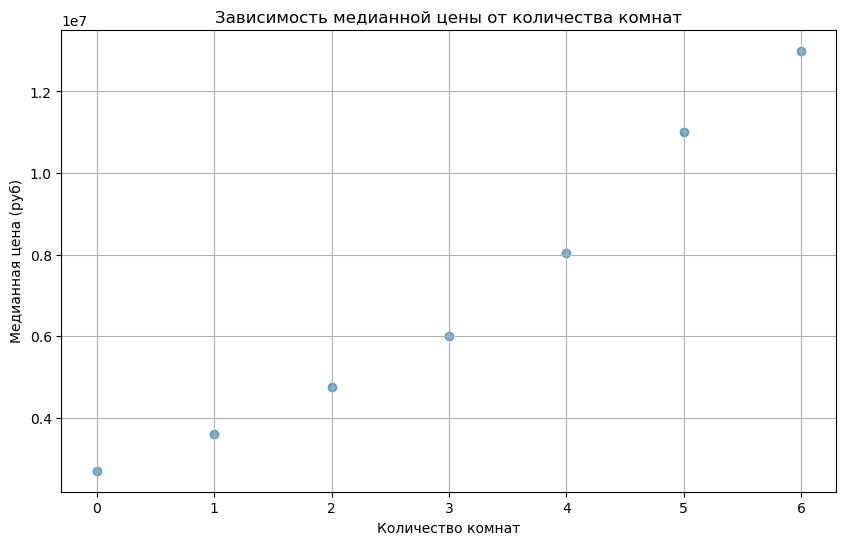

In [103]:
# Построение точечного графика
plt.figure(figsize=(10, 6))
plt.scatter(
    pivot_rooms_price['rooms'], 
    pivot_rooms_price['last_price'], 
    alpha=0.6  
)
plt.title('Зависимость медианной цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Медианная цена (руб)')
plt.grid(True)
plt.show()

In [104]:
print(pivot_rooms_price['rooms'].corr(pivot_rooms_price['last_price']))

0.9804149915178177


На графике наглядно видно, что заввисимость роста цены от количества комнат прямая.

**Зависимость цены от этажа (первый, последний, другой)**

Построим график, который покажет зависимость цены от этажа (первый, последний, другой).

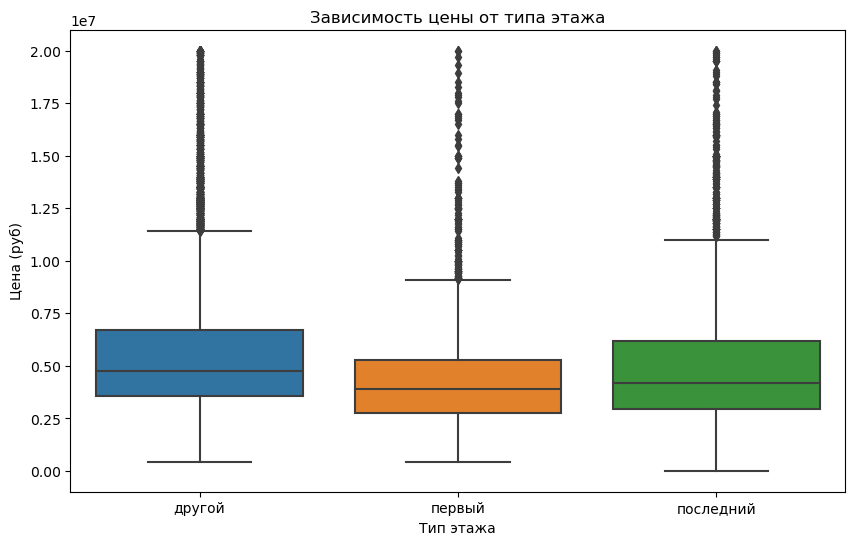

In [105]:
# Построение графика зависимости цены от типа этажа
plt.figure(figsize=(10, 6))
seaborn.boxplot(x=estate_data['floor_type'], y=estate_data['last_price'])
plt.title('Зависимость цены от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена (руб)')
plt.show()

Таким образом, из графика можно сделать вывод, что тип этажа действительно оказывает влияние на цену квартиры, причем квартиры на первом этаже, как правило, стоят дешевле.

**Зависимость цены от даты размещения**

**Неделя (week)**

Создадим сводную таблицу, для того чтобы увидеть медианные значения цен по каждому дню недели.

In [106]:
# Сводная таблица для зависимости цены от дня недели
pivot_day_price = estate_data.pivot_table(index='day_of_the_week_publ', values='last_price', aggfunc='median')

# Просмотр первых значений
pivot_day_price.head(7)

,last_price
day_of_the_week_publ,
0,4550000.0
1,4650000.0
2,4600000.0
3,4520000.0
4,4500000.0
5,4500000.0
6,4500000.0


Построим график, который покажет зависимость формирования цены от дня недели.

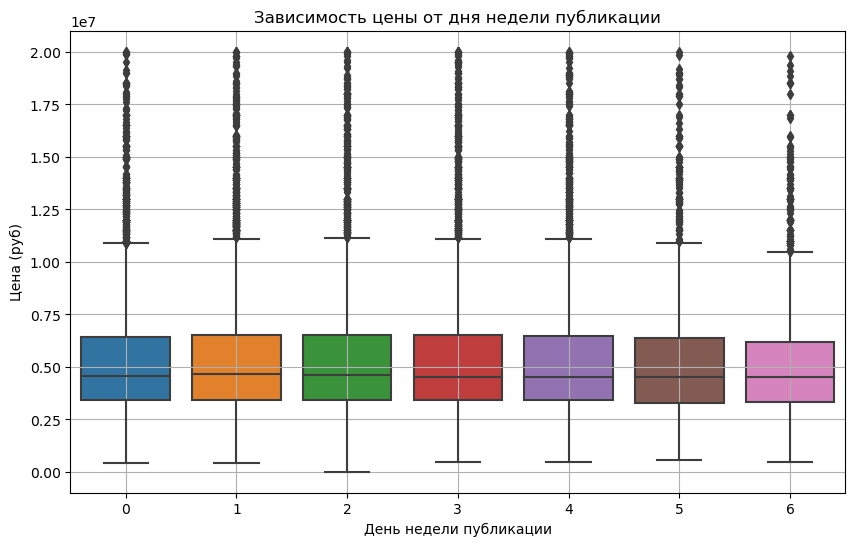

In [107]:
# Построение boxplot для дня недели и цены
plt.figure(figsize=(10, 6))
seaborn.boxplot(x=estate_data['day_of_the_week_publ'], y=estate_data['last_price'])
plt.title('Зависимость цены от дня недели публикации')
plt.xlabel('День недели публикации')
plt.ylabel('Цена (руб)')
plt.grid(True)
plt.show()

**Месяц (month)**

Создадим сводную таблицу, для того чтобы увидеть медианные значения цен по месяцам.

In [108]:
# Сводная таблица для зависимости цены от месяца
pivot_month_price = estate_data.pivot_table(index='month_publ', values='last_price', aggfunc='median')

# Просмотр первых значений
pivot_month_price.head(12)

,last_price
month_publ,
1,4500000.0
2,4550000.0
3,4578000.0
4,4700000.0
5,4500000.0
6,4300000.0
7,4500000.0
8,4500000.0
9,4600000.0


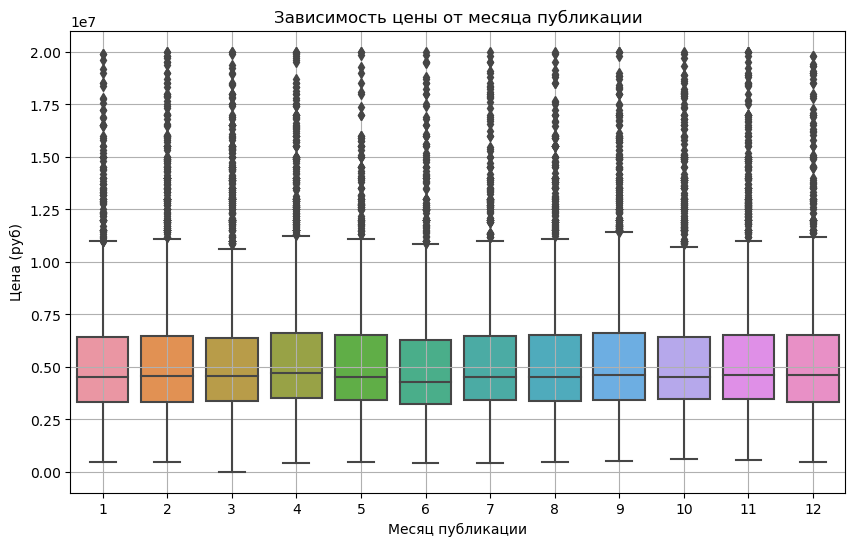

In [109]:
# Построение boxplot для месяца и цены
plt.figure(figsize=(10, 6))
seaborn.boxplot(x=estate_data['month_publ'], y=estate_data['last_price'])
plt.title('Зависимость цены от месяца публикации')
plt.xlabel('Месяц публикации')
plt.ylabel('Цена (руб)')
plt.grid(True)
plt.show()

**Год (year)**

Создадим сводную таблицу, для того чтобы увидеть медианные значения цен по годам.

In [110]:
# Сводная таблица для зависимости цены от года
pivot_month_price = estate_data.pivot_table(index='year_publ', values='last_price', aggfunc='median')

# Просмотр первых значений
pivot_month_price.head()

,last_price
year_publ,
2014,6445000.0
2015,5100000.0
2016,4400000.0
2017,4400000.0
2018,4500000.0


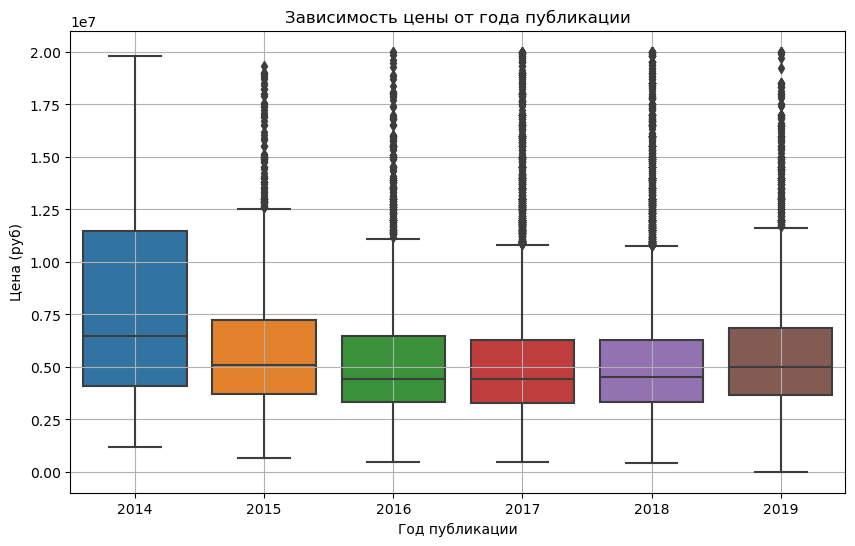

In [111]:
# Построение boxplot для года и цены
plt.figure(figsize=(10, 6))
seaborn.boxplot(x=estate_data['year_publ'], y=estate_data['last_price'])
plt.title('Зависимость цены от года публикации')
plt.xlabel('Год публикации')
plt.ylabel('Цена (руб)')
plt.grid(True)
plt.show()

Из графиков видно, что в 2014 году недвижимость стоила значительно выше. А уже в 2015 году, мы наблюдаем знасительное падение стоимости квартир. Предположительно из-за санкций, ухудшения экономического положения, уменьшился спрос. Вслед за падением спроса, начала и падать цена. Так как потребность в продаже квартир не исчезла. С 2017 года медианное значение стоимости жилья начало плавно рости вверх.

**Вывод:**



Больше всего цена зависит от года продажи квартиры, это логично т.к. в разные года в стране разная экономическая ситуация, месяц же и день недели не влияют практически нисколько, а вот то, на каком этаже расположена квартиры влияет сильнее. Люди платят меньше за квартиры на первых этажах.
Гораздо же больше на стоимость квартиры влияет ее общая площадь, жилая площадь и количество комнат. площадь кухни же влияет меньше, но все же влияет на конечную стоимость квартиры.

### Посчитайем среднюю цену одного квадратного метра.

Для анализа средней цены одного квадратного метра, создадим новую колонку с расчетом одного квадратного метра жилья.

In [112]:
estate_data['price_for_one_meter'] = round(estate_data['last_price'] / estate_data['total_area'], 2)
estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_cleaned,price_for_one_meter,day_of_the_week_publ,month_publ,year_publ,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,...,482.0,2,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,...,NaN,0,NaN,81.0,Шушары,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,...,90.0,2,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015,другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,...,112.0,1,48.0,121.0,Санкт-Петербург,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,...,NaN,0,NaN,55.0,Янино-1,95065.79,0,9,2018,другой,NaN


Выбираем 10 населённых пунктов с наибольшим числом объявлений

In [113]:
top_localities = estate_data['locality_name'].value_counts().head(10).index
top_localities

Index(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'посёлок Кудрово',
       'Выборг'],
      dtype='object')

Фильтруем данные по этим населённым пунктам

In [114]:
top_localities_data = estate_data[estate_data['locality_name'].isin(top_localities)]
top_localities_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_cleaned,price_for_one_meter,day_of_the_week_publ,month_publ,year_publ,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,...,482.0,2,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,...,NaN,0,NaN,81.0,Шушары,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,...,90.0,2,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015,другой,14.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,...,112.0,1,48.0,121.0,Санкт-Петербург,100000.00,1,6,2018,другой,8.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,...,NaN,0,NaN,155.0,Парголово,99195.71,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,False,False,...,NaN,0,NaN,NaN,Санкт-Петербург,110544.69,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,...,NaN,0,NaN,189.0,Мурино,87454.76,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,...,NaN,0,NaN,289.0,Санкт-Петербург,88524.59,6,2,2017,другой,15.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,...,310.0,2,553.0,137.0,Санкт-Петербург,127525.25,3,11,2017,другой,14.0
14,1,4400000.0,36.00,2016-06-23,1,2.65,6,17.00,1,False,False,...,NaN,1,96.0,203.0,Пушкин,122222.22,3,6,2016,первый,31.0


Создаём сводную таблицу для расчёта средней цены за квадратный метр по этим населённым пунктам

In [115]:
pivot_locality_price = top_localities_data.pivot_table(index='locality_name', values='price_for_one_meter', aggfunc='mean')
pivot_locality_price.sort_values(by='price_for_one_meter', ascending=False).head(10)

,price_for_one_meter
locality_name,
Санкт-Петербург,108712.826461
Пушкин,101794.625531
посёлок Кудрово,92473.547559
посёлок Парголово,90332.262638
посёлок Мурино,85656.214350
посёлок Шушары,78677.364318
Колпино,75333.295816
Гатчина,68757.678399
Всеволожск,67161.591187


Из полученных данных мы видим, что самая высокая цена за квадратный метр жилья расположенна в Санкт-Петербурге - 108712 руб., следом идет Пушкин - 101794 руб. Самый дешевый квадратный метр за жилье, среди чаще всего выставляемых это Выборг - 58093 руб.

### Рассчитаем зависимость цены и расстояния и среднюю цену каждого километра к центру города.

Отфильтруем данные только для Санкт-Петербурга:

In [117]:
estate_data_spb= estate_data.loc[estate_data['locality_name'] == 'Санкт-Петербург']
estate_data_spb.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_cleaned,price_for_one_meter,day_of_the_week_publ,month_publ,year_publ,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,...,482.0,2,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,...,90.0,2,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015,другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,...,112.0,1,48.0,121.0,Санкт-Петербург,100000.00,1,6,2018,другой,8.0
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,NaN,22,False,False,...,NaN,0,NaN,NaN,Санкт-Петербург,110544.69,3,4,2019,другой,12.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,...,NaN,0,NaN,289.0,Санкт-Петербург,88524.59,6,2,2017,другой,15.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,False,...,310.0,2,553.0,137.0,Санкт-Петербург,127525.25,3,11,2017,другой,14.0
15,16,4650000.0,39.0,2017-11-18,1,2.65,14,20.5,5,False,False,...,590.0,1,296.0,19.0,Санкт-Петербург,119230.77,5,11,2017,другой,14.0
16,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,False,False,...,420.0,0,NaN,397.0,Санкт-Петербург,81707.32,3,11,2017,первый,11.0
17,6,4180000.0,36.0,2016-09-09,1,2.65,17,16.5,7,False,False,...,NaN,1,859.0,571.0,Санкт-Петербург,116111.11,4,9,2016,другой,15.0
18,8,3250000.0,31.0,2017-01-27,1,2.50,5,19.4,2,False,False,...,759.0,0,NaN,168.0,Санкт-Петербург,104838.71,4,1,2017,другой,11.0


Округляем расстояние до центра до целых значений:

In [119]:
# Округление расстояния до центра в километрах и создание нового столбца
estate_data_spb['cityCenters_nearest_km_rounded'] = estate_data_spb['cityCenters_nearest_km'].round()
estate_data_spb.head(10)

C:\Users\Marat_Yangurov\AppData\Local\Temp\ipykernel_64264\1707742810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estate_data_spb['cityCenters_nearest_km_rounded'] = estate_data_spb['cityCenters_nearest_km'].round()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,locality_cleaned,price_for_one_meter,day_of_the_week_publ,month_publ,year_publ,floor_type,cityCenters_nearest_km,cityCenters_nearest_km_rounded
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,...,2,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.0,16.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,...,2,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015,другой,14.0,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,...,1,48.0,121.0,Санкт-Петербург,100000.00,1,6,2018,другой,8.0,8.0
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,NaN,22,False,False,...,0,NaN,NaN,Санкт-Петербург,110544.69,3,4,2019,другой,12.0,12.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,...,0,NaN,289.0,Санкт-Петербург,88524.59,6,2,2017,другой,15.0,15.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,False,...,2,553.0,137.0,Санкт-Петербург,127525.25,3,11,2017,другой,14.0,14.0
15,16,4650000.0,39.0,2017-11-18,1,2.65,14,20.5,5,False,False,...,1,296.0,19.0,Санкт-Петербург,119230.77,5,11,2017,другой,14.0,14.0
16,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,False,False,...,0,NaN,397.0,Санкт-Петербург,81707.32,3,11,2017,первый,11.0,11.0
17,6,4180000.0,36.0,2016-09-09,1,2.65,17,16.5,7,False,False,...,1,859.0,571.0,Санкт-Петербург,116111.11,4,9,2016,другой,15.0,15.0
18,8,3250000.0,31.0,2017-01-27,1,2.50,5,19.4,2,False,False,...,0,NaN,168.0,Санкт-Петербург,104838.71,4,1,2017,другой,11.0,11.0


Построим сводной таблицы для расчёта средней цены за квадратный метр по каждому километру:

In [121]:
# Сводная таблица с расчётом средней стоимости за квадратный метр квартир для каждого километра
pivot_price_by_distance = estate_data_spb.pivot_table(index='cityCenters_nearest_km_rounded', values='price_for_one_meter', aggfunc='mean')
pivot_price_by_distance.head(10)

,price_for_one_meter
cityCenters_nearest_km_rounded,
0.0,112706.250833
1.0,130543.739673
2.0,124006.167912
3.0,113053.996965
4.0,121032.224013
5.0,126288.958691
6.0,127343.403493
7.0,124100.789970
8.0,120685.345800


Построеним график зависимости средней цены за квадратный метр от расстояния до центра:

<Axes: xlabel='cityCenters_nearest_km_rounded'>

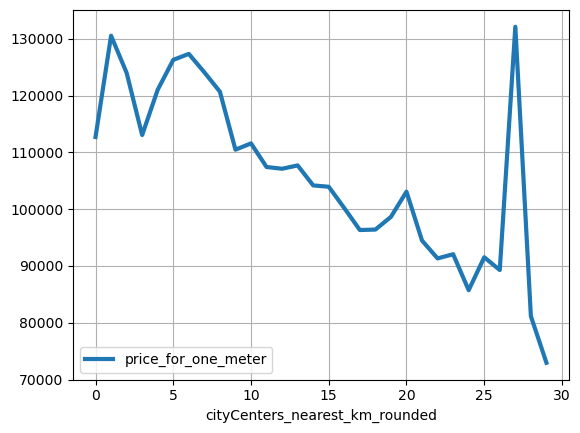

In [122]:
# Перемещаем индекс в столбец
pivot_price_by_distance.reset_index(inplace=True)

# Построим график изменения средней цены за квадратный метр от расстояния до центра Санкт-Петербурга
pivot_price_by_distance.plot(
    x='cityCenters_nearest_km_rounded',
    y='price_for_one_meter',
    kind='line',
    grid=True,
    legend=True,
    alpha=1,
    linewidth=3,
)

В среднем жители петербурга доплачивают где то 20_000 руб., за 1 кв.м., за 5 километр в глубь Санкт-Петербурга.


## 5. Общий вывод

В данном проекте мы провели: 

1. Первичный осмотр данных.

2. Предобработку данных.

    a. Заполнили пропущенные значения.
    
    b. Исправили типы данных.
    
    c. Обработали аномальные значения.
    
    e. Обработали дубликаты.

3. Провели исследовательский анализ данных. 

    a. Среди всех объявлений преобладает застройка в 5 и 9 этажей, большинство объявлений не расположено на крайних этажах.
    
    b. Общая площадь влияет на конечную цену больше всего, далее идет жилая, а после площадь кухни.
    
    c. Добавили в таблицу несколько стобцов, таких как расстояние до центра в километрах, цена одного квадратного метра, день публикации, месяц публикации, год публикации объявления.

Дали несколько предложений по улучшению работы сервиса:

1) Сделать возможности выбора типа населенных пунктов, т.е. сделать этот тип объектом, такой подход сохранит время аналитиков и всего бизнеса в целом, также уменьшит количество выбросов.

2) В ячейках с высотой потолков сделать число с обязательной точкой, это тоже сэкономит время и деньги бизнеса.

3) Последнее, Добавить в приложение автоматический калькулятор цены за один километр до центра, это поможет покупателям увидеть какие продавцы берут явно больше за близость к центру, также можно будет добавить фильтр по этому параметру и другим.